In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

# Data Cleaning

In [2]:
# set path
whales_data=Path("./Resources/whale_returns.csv")
algo_data=Path("./Resources/algo_returns.csv")
sp500_data=Path("./Resources/sp500_history.csv")

## Whales Daily Returns

In [3]:
# Reading whale returns
whales_df=pd.read_csv(whales_data,index_col="Date",infer_datetime_format=True, parse_dates=True)
whales_df.head(5)

C:\Users\Asia\AppData\Local\Temp\ipykernel_11424\2471812433.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whales_df=pd.read_csv(whales_data,index_col="Date",infer_datetime_format=True, parse_dates=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whales_df.dropna(inplace=True)
whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
whales_df.sort_index(inplace=True)
whales_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

In [7]:
algo_df=pd.read_csv(algo_data,index_col="Date",infer_datetime_format=True, parse_dates=True)
algo_df.head(5)

C:\Users\Asia\AppData\Local\Temp\ipykernel_11424\1620295450.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df=pd.read_csv(algo_data,index_col="Date",infer_datetime_format=True, parse_dates=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df=algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [10]:
algo_df.sort_index()
algo_df.head(5)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

In [11]:

sp500_df=pd.read_csv(sp500_data,index_col="Date",infer_datetime_format=True, parse_dates=True)
sp500_df.head(5)

C:\Users\Asia\AppData\Local\Temp\ipykernel_11424\1473251202.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df=pd.read_csv(sp500_data,index_col="Date",infer_datetime_format=True, parse_dates=True)
C:\Users\Asia\AppData\Local\Temp\ipykernel_11424\1473251202.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df=pd.read_csv(sp500_data,index_col="Date",infer_datetime_format=True, parse_dates=True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [12]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_df["Close"]=sp500_df["Close"].str.replace("$","").astype(float)

sp500_df.head(5)

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [14]:
#Calculate Daily Returns
sp500_df=sp500_df.sort_index(ascending=True)
sp500_dailyreturns=sp500_df.pct_change().dropna()
sp500_dailyreturns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [15]:
sp500_dailyreturns.isnull().sum()

Close    0
dtype: int64

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_dailyreturns=sp500_dailyreturns.rename(columns={"Close":"SP500"})
sp500_dailyreturns.head(5)

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df=pd.concat([whales_df,algo_df,sp500_dailyreturns], axis="columns", join="inner")
combined_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Quantitative Analysis

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns of all Portfolios'}, xlabel='Date'>

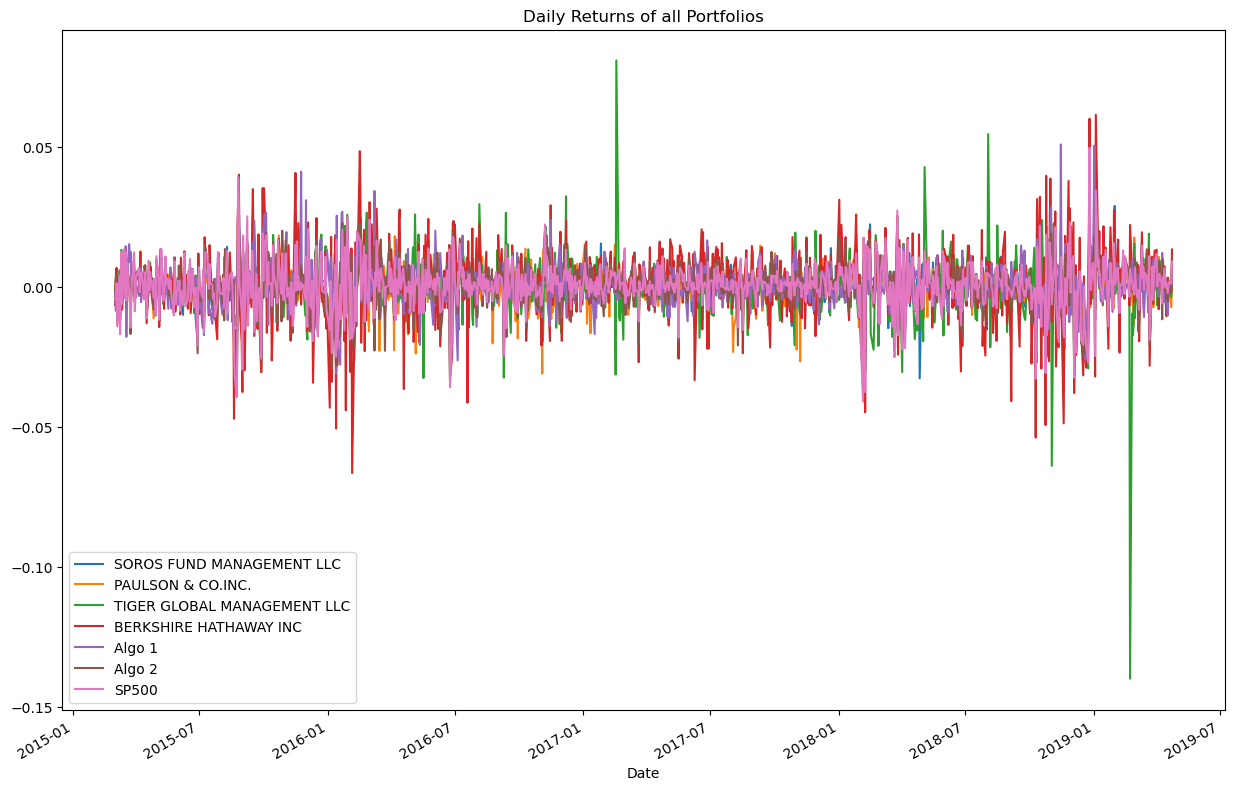

In [18]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(15,10),title="Daily Returns of all Portfolios")

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns of all Portfolios'}, xlabel='Date'>

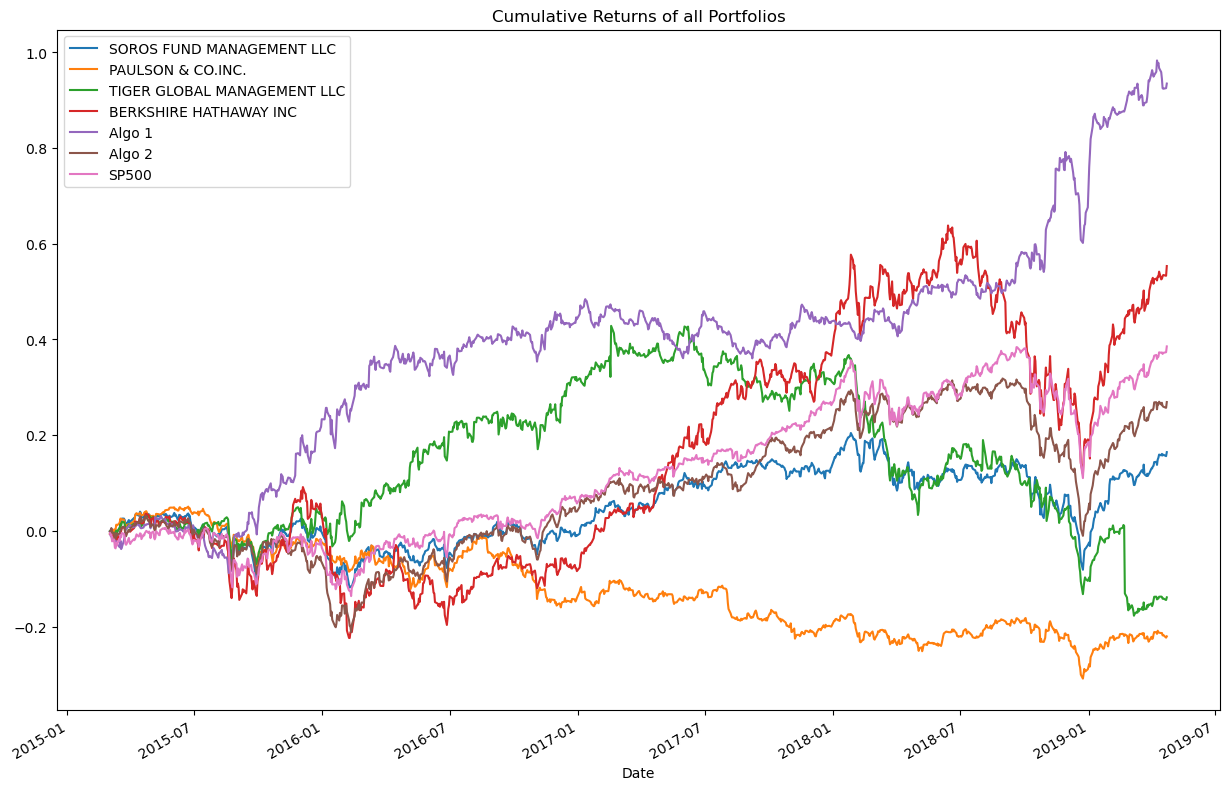

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10),title="Cumulative Returns of all Portfolios")

## Risk Analysis

<Axes: >

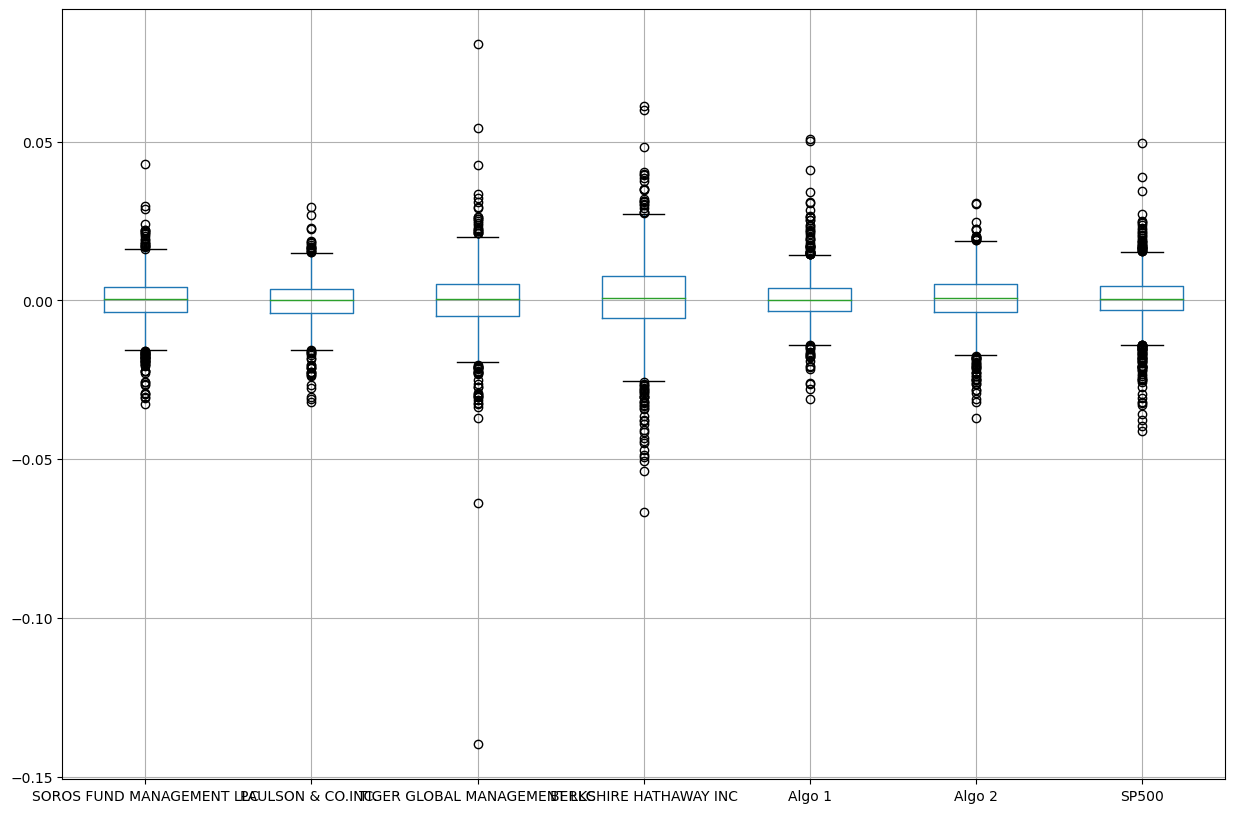

In [20]:
# Create a box plot for each portfolio. 
combined_df.boxplot(figsize=(15,10))


### Standard Deviation

In [21]:
# Calculate the standard deviation for all portfolios
all_portfolio_std=combined_df.std()
all_portfolio_std.sort_values(ascending=True,inplace=True)
all_portfolio_std

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP500                          0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [22]:
# Determine which portfolios are riskier than the S&P 500

sp500_sd=all_portfolio_std["SP500"]   # get the value of SP500 from above calculated STD for comparison with other portfolios
all_std_df=pd.DataFrame(all_portfolio_std).rename(columns={0:"STD"}) # converted above retrieved data into Data Frame
riskier_std=all_std_df[all_std_df["STD"]>sp500_sd]                   # extracted values > SP500 SD

print(f"Portfolios riskier than SP500 are :{riskier_std.index.to_list()}")
riskier_std


Portfolios riskier than SP500 are :['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']


,STD
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


##### Calculate the Annualized Standard Deviation

In [23]:
annualized_sd=combined_df.std()* np.sqrt(252)   #(252 trading days)
print(annualized_sd)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64


## Rolling Statistics
 Analyze the rolling statistics for Risk and Beta

### Calculate and plot rolling std for all portfolios with 21-day window

<Axes: title={'center': 'Rolling STD of all Portfolios'}, xlabel='Date'>

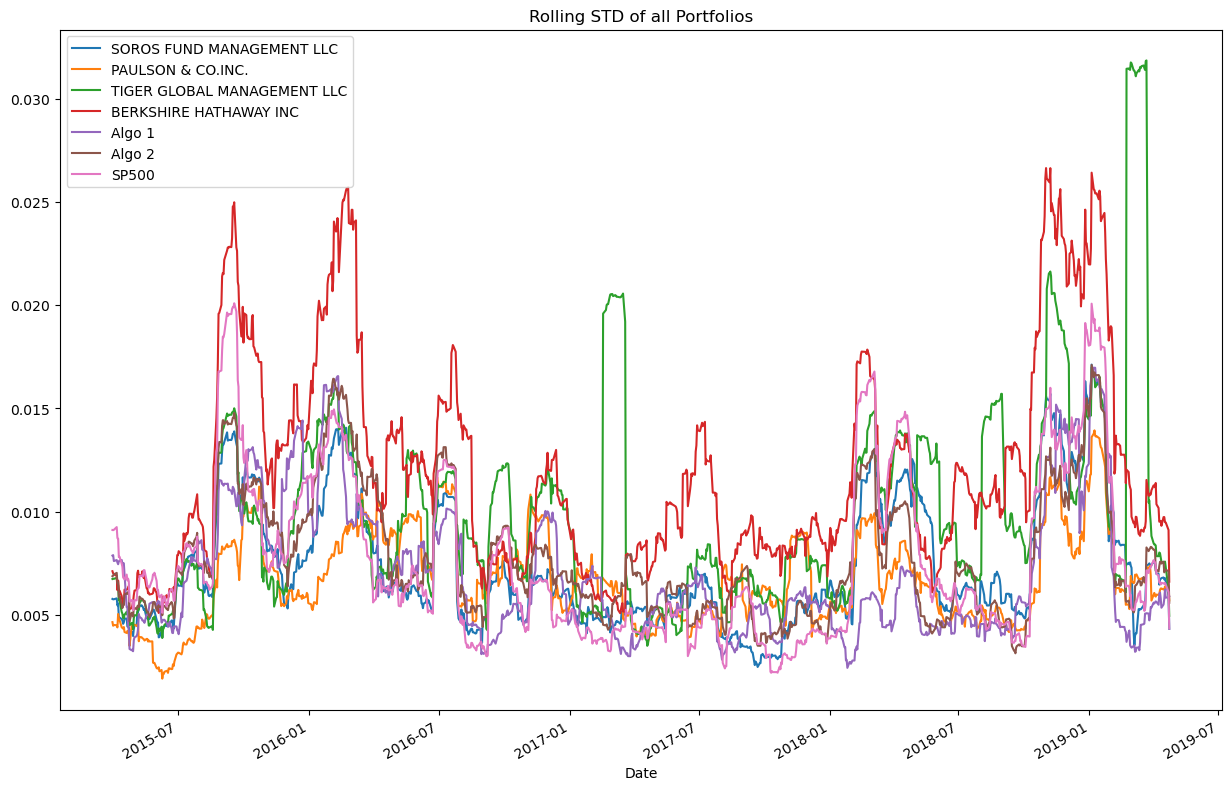

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window & plot
combined_df.rolling(window=21).std().plot(figsize=(15,10),title="Rolling STD of all Portfolios")

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
correlation=combined_df.corr()
# Display correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [26]:
# determine which portfolios mimic the S&P 500.
correlation_sp500 = pd.DataFrame(correlation).loc[:,"SP500"].sort_values(ascending=False)
best_mimic=correlation_sp500.iloc[1:2]
print(f"The portfolios that mimic S&P 500 is  {best_mimic}")

The portfolios that mimic S&P 500 is  Algo 2    0.858764
Name: SP500, dtype: float64


<Axes: >

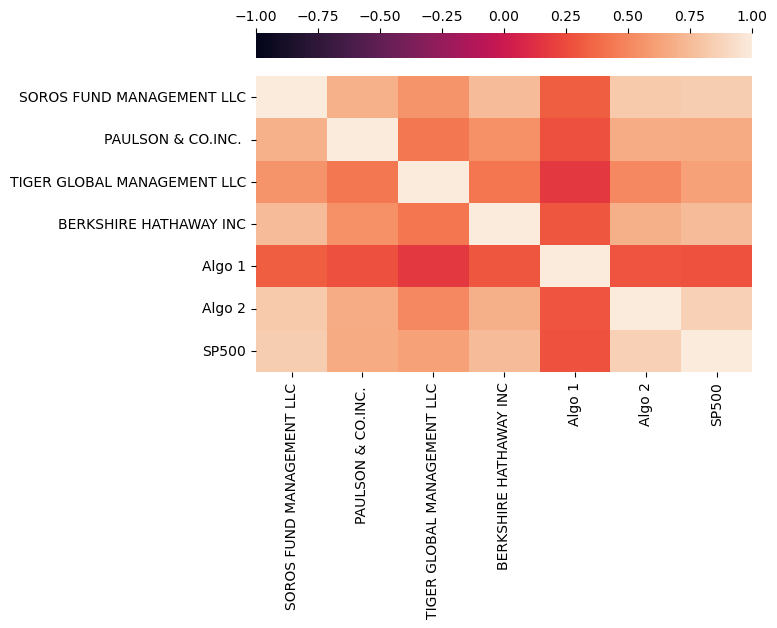

In [27]:
# Heatmap
sns.heatmap(correlation,vmin=-1,vmax=1,cbar_kws = dict(use_gridspec=False,location="top"))

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [28]:
combined_df.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP500'],
      dtype='object')

In [29]:
# Calculate covariance of a single portfolio (TIGER GLOBAL MANAGEMENT LLC)

tig_global_covariance = combined_df["TIGER GLOBAL MANAGEMENT LLC"].cov(combined_df["SP500"])

tig_global_covariance

# Calculate variance of S&P 500
variance_sp500 = combined_df['SP500'].var()

# Computing beta
tig_global_beta=tig_global_covariance/variance_sp500
print(f"Beta for TIGER GLOBAL MANAGEMENT LLC : {tig_global_beta}")

Beta for TIGER GLOBAL MANAGEMENT LLC : 0.7946528805681025


#### Calculate and Plot Rolling Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Rolling Beta "TIGER GLOBAL MANAGEMENT LLC"'}, xlabel='Date'>

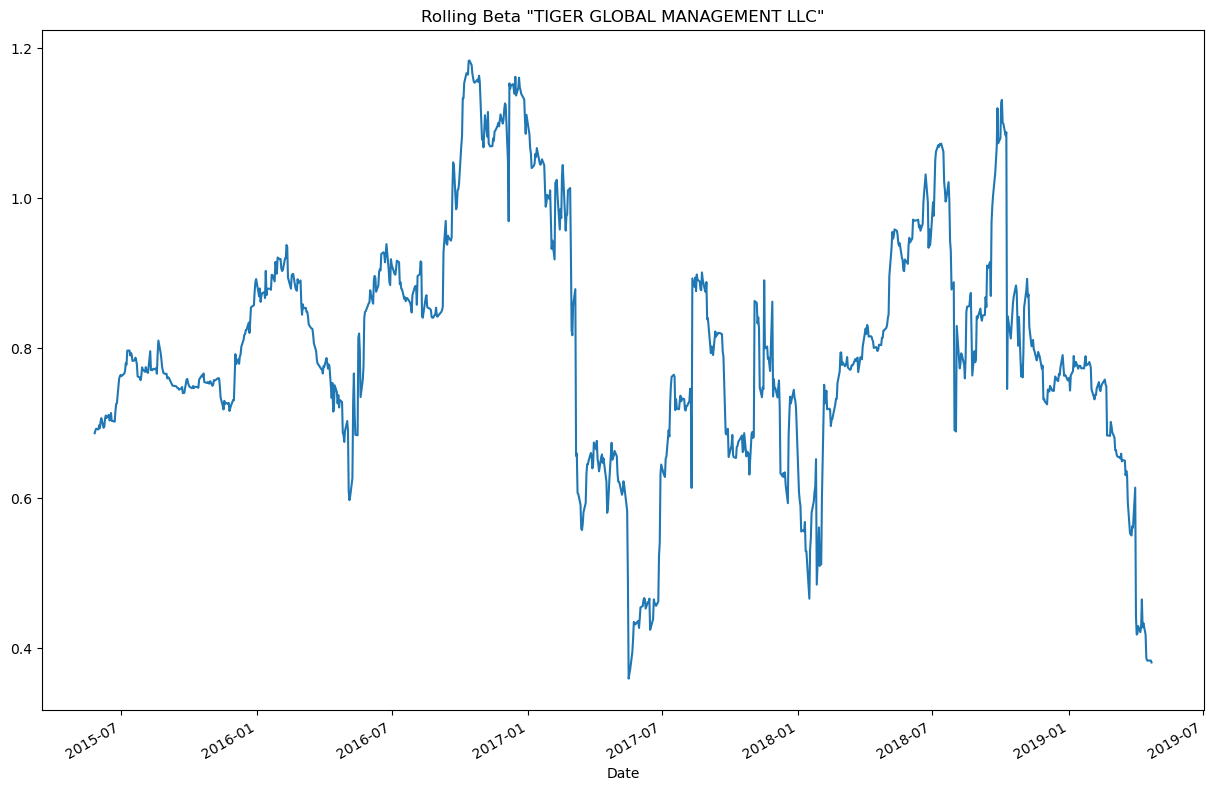

In [30]:
# calculate 60 days Rolling covariance between TIGER GLOBAL MANAGEMENT LLC and the S&P 500.
tig_global_rollingcov=combined_df["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(combined_df["SP500"])

# Rolling variance of S&P 500
rolling_variancesp500 = combined_df['SP500'].rolling(window=60).var()

# Rolling Beta

rolling_beta=tig_global_rollingcov/rolling_variancesp500

# Plot beta trend
rolling_beta.plot(figsize=(15,10),title='Rolling Beta "TIGER GLOBAL MANAGEMENT LLC"' )

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'EWM'}, xlabel='Date'>

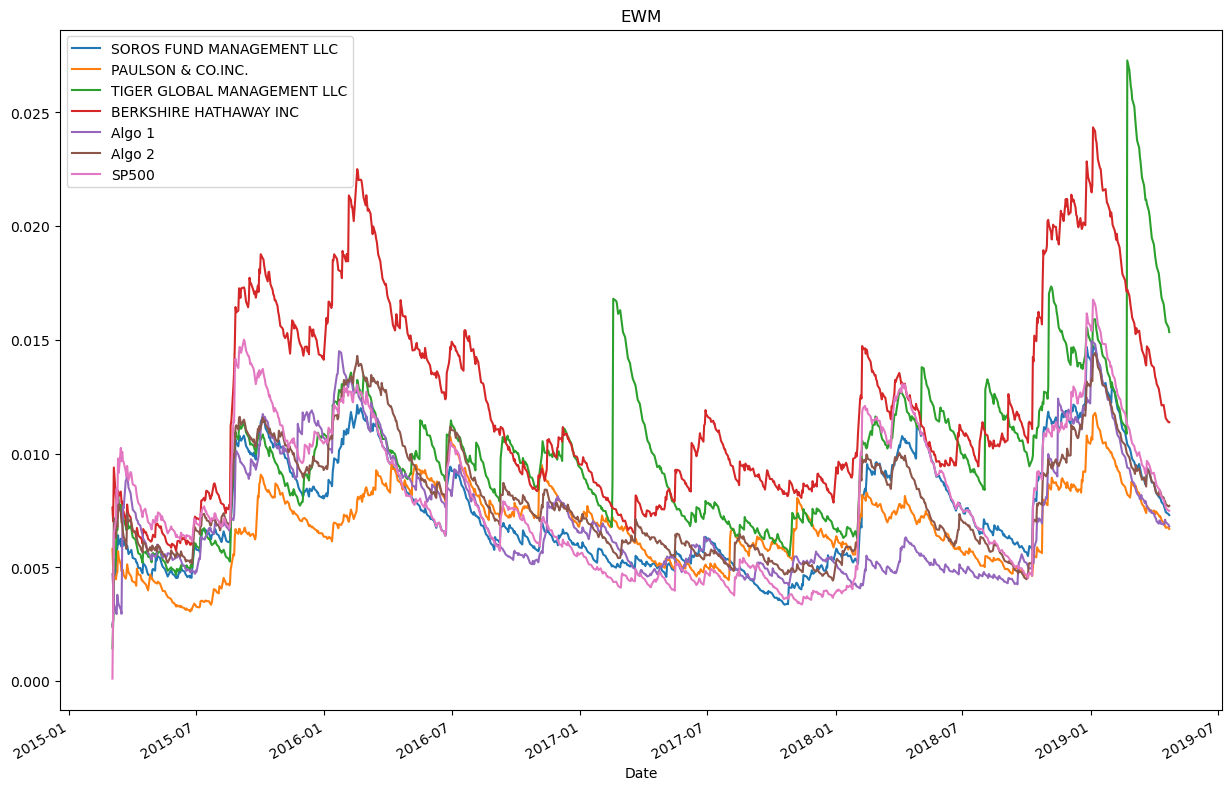

In [31]:
# Use `ewm` to calculate the rolling window
#syntax:  df.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0)
combined_df.ewm(halflife=21).std().plot(figsize=(15,10),title="EWM")

# Sharpe Ratios

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [32]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False,inplace=True)
sharpe_ratios

Algo 1                         1.378648
SP500                          0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

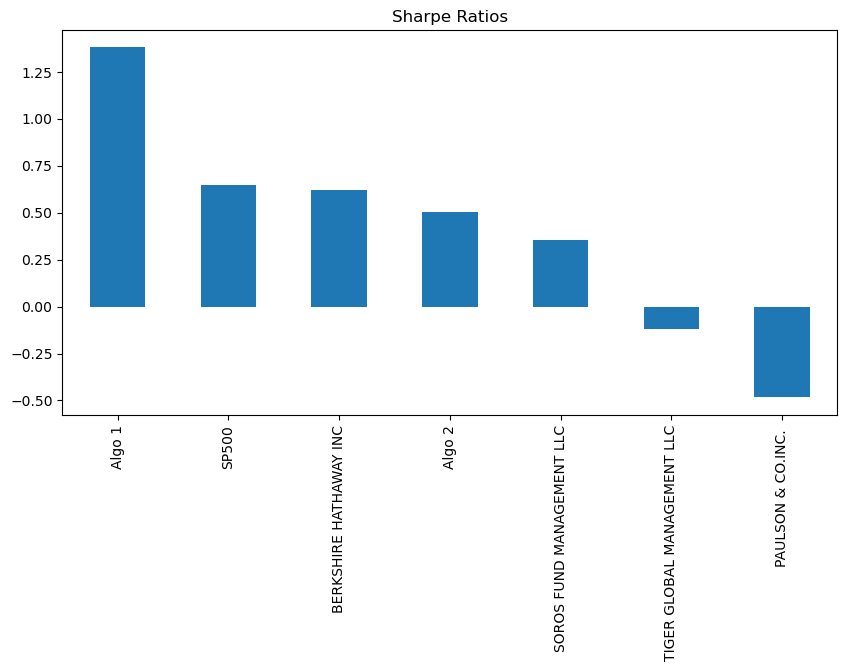

In [33]:
# Visualize sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar",figsize=(10,5),title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
From the above sharp ratios, it can be seen that Algo1 has the higest while Algo2 has the third highest ratio. Overall, Algorithmic startegies have outperformed both SP500 and Whales portfolios.

# Create Custom Portfolio

### Choose 3 custom stocks with at last 1 year's worth of historic prices and creating a DataFrame of the closing prices and dates for each stock.

In [34]:
# set file path for customized portfolio
aapl_data=Path("./Resources/AAPL.csv")
msft_data=Path("./Resources/MSFT.csv")
amzn_data=Path("./Resources/AMZN.csv")

In [35]:
# reading AAPL data
aapl_df=pd.read_csv(aapl_data,index_col="Date",infer_datetime_format=True, parse_dates=True)
aapl_df.rename(columns={"Close":"AAPL"},inplace=True)
aapl_df.head(5)

C:\Users\Asia\AppData\Local\Temp\ipykernel_11424\2857226389.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df=pd.read_csv(aapl_data,index_col="Date",infer_datetime_format=True, parse_dates=True)


,AAPL
Date,
2018-05-01 16:00:00,42.28
2018-05-02 16:00:00,44.14
2018-05-03 16:00:00,44.22
2018-05-04 16:00:00,45.96
2018-05-07 16:00:00,46.29


In [36]:
# reading MSFT data
msft_df=pd.read_csv(msft_data,index_col="Date",infer_datetime_format=True, parse_dates=True)
msft_df=msft_df.rename(columns={"Close":"MSFT"})
msft_df.head(5)

C:\Users\Asia\AppData\Local\Temp\ipykernel_11424\1543966797.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  msft_df=pd.read_csv(msft_data,index_col="Date",infer_datetime_format=True, parse_dates=True)


,MSFT
Date,
2018-05-01 16:00:00,95.00
2018-05-02 16:00:00,93.51
2018-05-03 16:00:00,94.07
2018-05-04 16:00:00,95.16
2018-05-07 16:00:00,96.22


In [37]:
# reading AMZN
amzn_df=pd.read_csv(amzn_data,index_col="Date",infer_datetime_format=True, parse_dates=True)
amzn_df=amzn_df.rename(columns={"Close":"AMZN"})
amzn_df.head(5)

C:\Users\Asia\AppData\Local\Temp\ipykernel_11424\2181418120.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  amzn_df=pd.read_csv(amzn_data,index_col="Date",infer_datetime_format=True, parse_dates=True)


,AMZN
Date,
2018-01-05 16:00:00,61.46
2018-01-08 16:00:00,62.34
2018-01-09 16:00:00,62.64
2018-01-10 16:00:00,62.72
2018-01-11 16:00:00,63.83


In [38]:
# Combine all stocks in a single DataFrame
combined_custom_df=pd.concat([aapl_df,msft_df,amzn_df],axis="columns",join="inner")
combined_custom_df.sort_index(inplace=True)
combined_custom_df.head(5)

,AAPL,MSFT,AMZN
Date,,,
2018-05-01 16:00:00,42.28,95.00,79.11
2018-05-02 16:00:00,44.14,93.51,78.48
2018-05-03 16:00:00,44.22,94.07,78.60
2018-05-04 16:00:00,45.96,95.16,79.05
2018-05-07 16:00:00,46.29,96.22,80.01


In [39]:
# DatetimeIndex.normalize
combined_custom_df.index = combined_custom_df.index.normalize()
combined_custom_df.head(5)

,AAPL,MSFT,AMZN
Date,,,
2018-05-01,42.28,95.00,79.11
2018-05-02,44.14,93.51,78.48
2018-05-03,44.22,94.07,78.60
2018-05-04,45.96,95.16,79.05
2018-05-07,46.29,96.22,80.01


In [40]:
# Calculate daily returns & Drop NAs
daily_returns_custom=combined_custom_df.pct_change().dropna()
daily_returns_custom.head(5)

,AAPL,MSFT,AMZN
Date,,,
2018-05-02,0.043992,-0.015684,-0.007964
2018-05-03,0.001812,0.005989,0.001529
2018-05-04,0.039349,0.011587,0.005725
2018-05-07,0.007180,0.011139,0.012144
2018-05-08,0.004753,-0.004261,-0.004874


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
custom_portfolio_returns=daily_returns_custom.dot(weights)
custom_portfolior_df= pd.DataFrame(custom_portfolio_returns)
custom_portfolior_df.rename(columns={0:"CUSTOM"},inplace=True)
custom_portfolior_df.head(5)

,CUSTOM
Date,
2018-05-02,0.006782
2018-05-03,0.003110
2018-05-04,0.018887
2018-05-07,0.010155
2018-05-08,-0.001461


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [42]:
# Join your returns DataFrame to the original returns DataFrame
new_combined_df=pd.concat([combined_df,custom_portfolior_df],axis="columns",join="inner")

# Only compare dates where return data exists for all the stocks (drop NaNs)
new_combined_df.dropna(inplace=True)
new_combined_df.sort_index(inplace=True)
new_combined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
CUSTOM                         0
dtype: int64

In [43]:
new_combined_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,CUSTOM
Date,,,,,,,,
2018-05-02,-0.007923,-0.011448,-0.019454,0.000131,0.005558,0.001319,-0.007206,0.006782
2018-05-03,-0.005584,-0.010606,0.008883,0.000822,0.008960,-0.002614,-0.002254,0.003110
2018-05-04,0.013363,0.006909,0.042637,0.008794,0.000648,0.008404,0.012811,0.018887
2018-05-07,0.008047,0.002994,0.010428,0.008954,0.006150,0.003798,0.003458,0.010155
2018-05-08,-0.003793,-0.010821,-0.001354,-0.000946,-0.001733,0.001310,-0.000266,-0.001461


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [44]:
new_annualized_sd=new_combined_df.std()*np.sqrt(252)
new_annualized_sd

SOROS FUND MANAGEMENT LLC      0.158439
PAULSON & CO.INC.              0.124226
TIGER GLOBAL MANAGEMENT LLC    0.208876
BERKSHIRE HATHAWAY INC         0.268384
Algo 1                         0.148619
Algo 2                         0.146689
SP500                          0.167329
CUSTOM                         0.297673
dtype: float64

In [45]:
# Determine which portfolios are riskier than the S&P 500

new_sp500_sd=new_annualized_sd["SP500"]   # get the value of SP500 from above calculated STD for comparison with other portfolios
new_std_df=pd.DataFrame(new_annualized_sd).rename(columns={0:"STD"}) # converted above retrieved data into Data Frame
new_riskier_std=new_std_df[new_std_df["STD"]>new_sp500_sd]                   # extracted values > SP500 SD

print(f"Portfolios riskier than SP500 are :{new_riskier_std.index.to_list()}")
new_riskier_std


Portfolios riskier than SP500 are :['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'CUSTOM']


,STD
TIGER GLOBAL MANAGEMENT LLC,0.208876
BERKSHIRE HATHAWAY INC,0.268384
CUSTOM,0.297673


### Calculate and plot rolling `std` with 21-day window

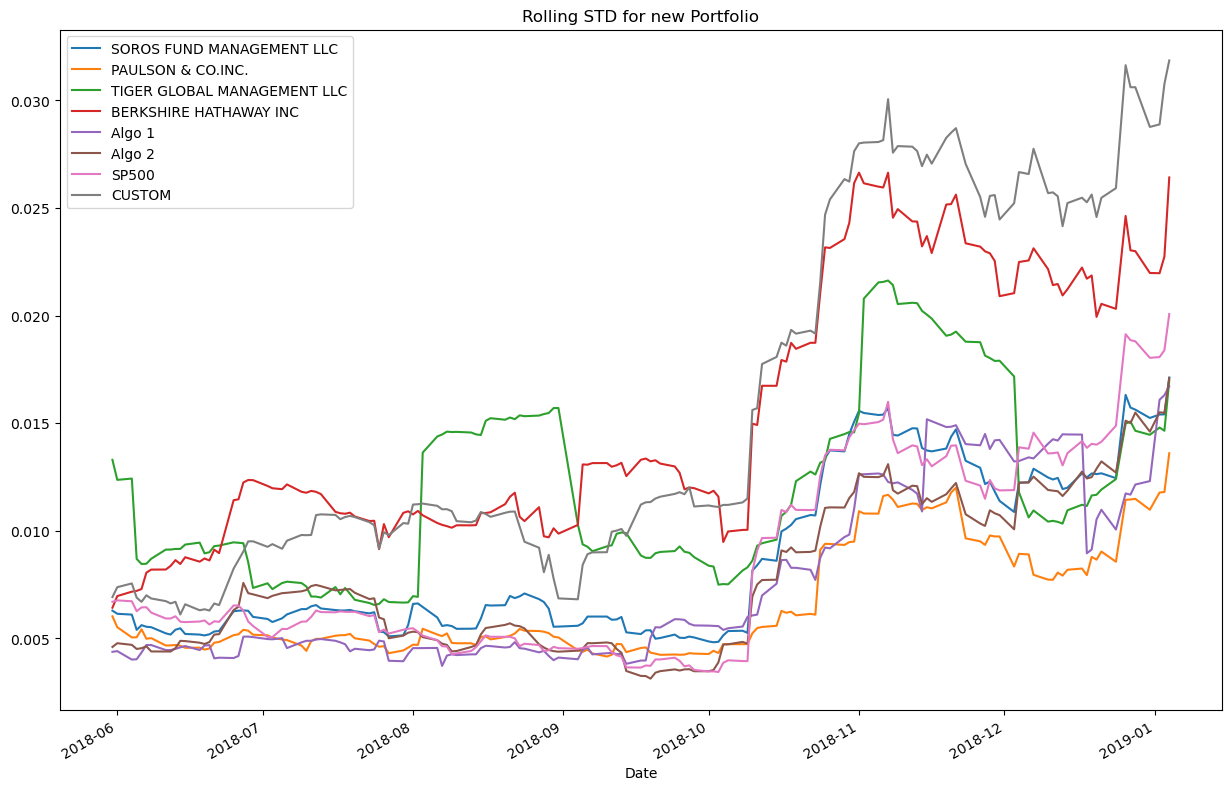

In [46]:
# Calculate & plot rolling standard deviation
new_rolling_std=new_combined_df.rolling(window=21).std().plot(figsize=(15,10),title="Rolling STD for new Portfolio")

### Calculate and plot the correlation

In [47]:
# Calculate and plot the correlation
new_correlation=new_combined_df.corr()
new_correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,CUSTOM
SOROS FUND MANAGEMENT LLC,1.000000,0.816005,0.605278,0.835710,0.397087,0.874963,0.895215,0.780939
PAULSON & CO.INC.,0.816005,1.000000,0.645158,0.673666,0.411274,0.800842,0.798093,0.667895
TIGER GLOBAL MANAGEMENT LLC,0.605278,0.645158,1.000000,0.473694,0.176601,0.572038,0.651258,0.489093
BERKSHIRE HATHAWAY INC,0.835710,0.673666,0.473694,1.000000,0.364822,0.794164,0.853316,0.868201
Algo 1,0.397087,0.411274,0.176601,0.364822,1.000000,0.429236,0.313995,0.325484
Algo 2,0.874963,0.800842,0.572038,0.794164,0.429236,1.000000,0.879433,0.790887
SP500,0.895215,0.798093,0.651258,0.853316,0.313995,0.879433,1.000000,0.892317
CUSTOM,0.780939,0.667895,0.489093,0.868201,0.325484,0.790887,0.892317,1.000000


In [48]:
# determine which portfolios mimic the S&P 500.
new_correlation_sp500 = pd.DataFrame(new_correlation).loc[:,"SP500"].sort_values(ascending=False)
best_mimic=new_correlation_sp500.iloc[1:2]
print(f"Per new portfolio data, the portfolios that mimic S&P 500 is  {best_mimic}")

Per new portfolio data, the portfolios that mimic S&P 500 is  SOROS FUND MANAGEMENT LLC    0.895215
Name: SP500, dtype: float64


In [49]:
# determine which portfolio custom portfolio mimics.
correlation_custom = pd.DataFrame(new_correlation).loc[:,"CUSTOM"].sort_values(ascending=False)
custom_mimic=correlation_custom.iloc[1:2]
print(f'Customized portfolio best mimics with  {custom_mimic} " ')

Customized portfolio best mimics with  SP500    0.892317
Name: CUSTOM, dtype: float64 " 


<Axes: >

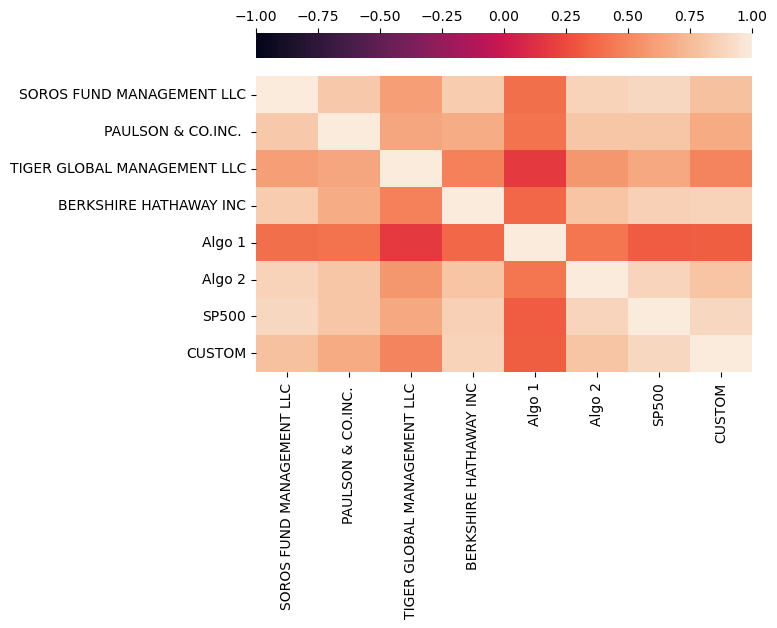

In [50]:
sns.heatmap(new_correlation,vmin=-1,vmax=1,cbar_kws = dict(use_gridspec=False,location="top"))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [51]:
new_combined_df.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP500', 'CUSTOM'],
      dtype='object')

<Axes: title={'center': 'ROLLING BETA CUSTOM PORTFOLIO'}, xlabel='Date'>

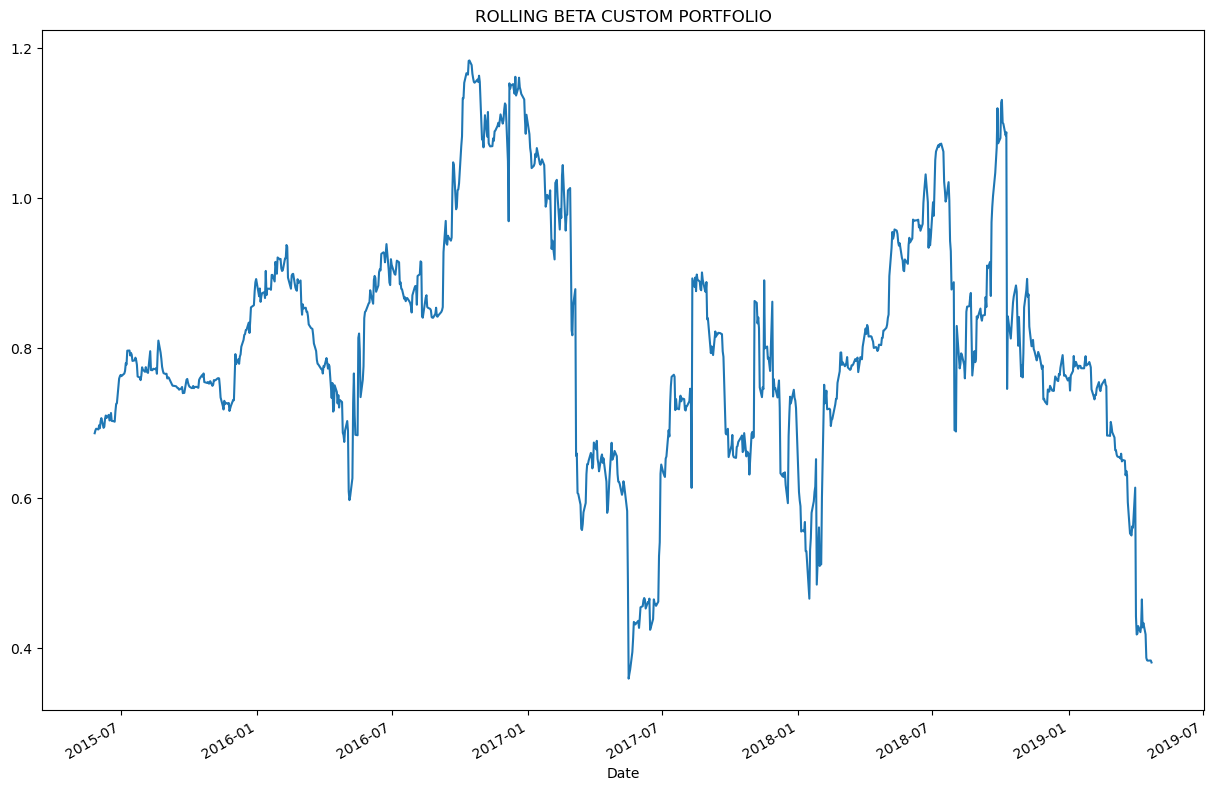

In [52]:
# calculate 60 days Rolling covariance between TIGER GLOBAL MANAGEMENT LLC and the S&P 500.
custom_rollingcov=new_combined_df["CUSTOM"].rolling(window=60).cov(new_combined_df["SP500"])

# Rolling variance of S&P 500
new_rollingvariancesp500 = new_combined_df['SP500'].rolling(window=60).var()

# Rolling Beta

new_rollingbeta=custom_rollingcov/new_rollingvariancesp500

# Plot beta trend
rolling_beta.plot(figsize=(15,10),title='ROLLING BETA CUSTOM PORTFOLIO' )

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [53]:
# Annualized Sharpe Ratios
new_sharpe_ratios = (new_combined_df.mean() * 252) / (new_combined_df.std() * np.sqrt(252))
new_sharpe_ratios.sort_values(ascending=False,inplace=True)
new_sharpe_ratios

Algo 1                         2.164355
CUSTOM                         0.073818
SP500                         -0.334092
PAULSON & CO.INC.             -0.415202
TIGER GLOBAL MANAGEMENT LLC   -0.814800
SOROS FUND MANAGEMENT LLC     -0.837883
BERKSHIRE HATHAWAY INC        -1.027718
Algo 2                        -1.346951
dtype: float64

<Axes: title={'center': 'Sharpe Ratios CUSTOMIZED Portfolio'}>

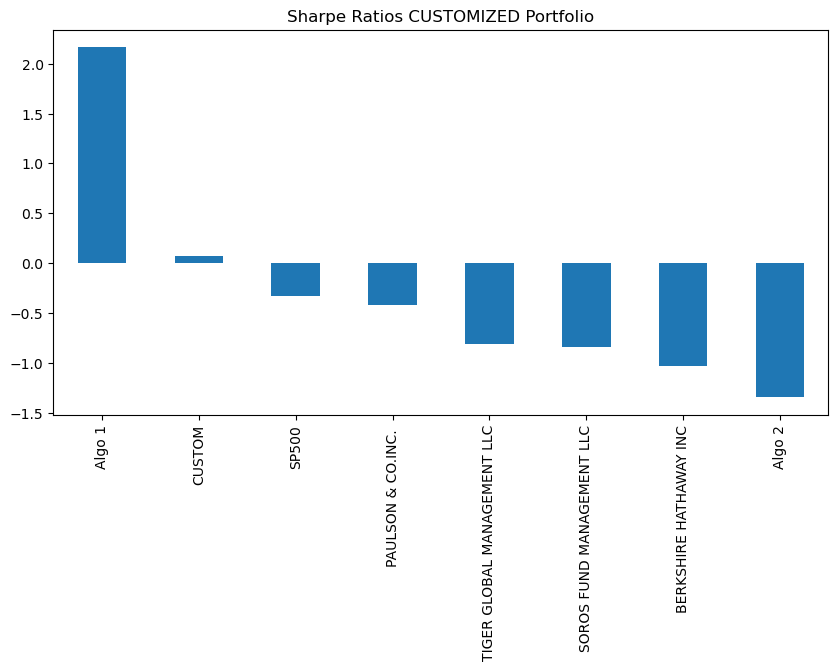

In [54]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratios.plot(kind="bar",figsize=(10,5),title="Sharpe Ratios CUSTOMIZED Portfolio")

### How does your portfolio do?

As from above chart can be seen "Custom Portfolio" is only beaten by "Algo1" but is performing well than all other potfolios.